## Import important libraries and read data

In [2]:
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_parquet('api_management_clean.parquet')

## Overview

In [4]:
df.shape

(1000000, 20)

In [5]:
df.head()

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type
0,WARNING,429,POST,username_1376,10,0,Silver,2022-06-28T10:24:46.000000Z,INPUT,provider_186,gateway_657,200,1,958,PREPAID,endpoint_1201,479,600,EXTERNAL,undefined
1,WARNING,335,GET,username_1376,10,0,Bronze,2021-09-18T05:43:21.000000Z,OUTPUT,provider_186,gateway_657,400,0,576,POSTPAID,endpoint_1201,288,404,EXTERNAL,undefined
2,WARNING,404,POST,username_1376,20,0,Gold,2022-04-03T03:52:45.000000Z,OUTPUT,provider_186,gateway_657,401,0,395,POSTPAID,endpoint_1201,197,300,INTERNAL,oauth
3,ERROR,400,POST,username_1376,20,0,Bronze,2023-02-14T18:38:42.000000Z,INPUT,provider_186,gateway_657,200,1,342,POSTPAID,endpoint_1201,171,408,INTERNAL,undefined
4,WARNING,429,GET,username_1376,50,0,Bronze,2021-07-12T11:09:06.000000Z,OUTPUT,provider_186,gateway_657,403,0,330,PREPAID,endpoint_1201,165,404,EXTERNAL,undefined


In [6]:
df.tail()

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type
999995,INFO,335,POST,username_114,10,0,Bronze,2022-12-09T19:11:48.000000Z,OUTPUT,provider_186,gateway_657,300,0,985,POSTPAID,endpoint_937,492,401,EXTERNAL,undefined
999996,INFO,403,POST,username_1376,10,0,Bronze,2022-11-27T23:10:03.000000Z,INPUT,provider_186,gateway_657,302,0,368,POSTPAID,endpoint_1201,184,509,EXTERNAL,undefined
999997,WARNING,404,POST,username_1376,50,1,Bronze,2022-03-31T02:07:14.000000Z,OUTPUT,provider_186,gateway_657,403,0,378,POSTPAID,endpoint_1201,189,200,INTERNAL,undefined
999998,INFO,400,POST,username_1376,10,0,Bronze,2022-12-29T17:14:25.000000Z,OUTPUT,provider_186,gateway_657,503,0,309,POSTPAID,endpoint_1201,154,403,EXTERNAL,undefined
999999,INFO,300,POST,username_1376,10,0,Gold,2022-02-20T20:11:58.000000Z,OUTPUT,provider_186,gateway_657,408,0,344,POSTPAID,endpoint_1201,172,600,INTERNAL,undefined


In [7]:
df.describe()

,response_Time,providerResponse_Time
count,1000000.000000,1000000.000000
mean,393.562312,196.529349
std,823.455773,411.748704
min,0.000000,0.000000
25%,150.000000,75.000000
50%,249.000000,124.000000
75%,356.000000,178.000000
max,10268.000000,5134.000000


In [8]:
df.dtypes

log_level                object
code                     object
method                   object
username                 object
Price                    object
gwStatus                 object
planName                 object
received_at              object
log_type                 object
providerName             object
gatewayName              object
response_status          object
status                   object
response_Time             int64
paymentType              object
endpoint                 object
providerResponse_Time     int64
gwCode                   object
call_type                object
api_type                 object
dtype: object

## Cleansing

### Check Nulls

In [9]:
df.isnull().sum()

log_level                0
code                     0
method                   0
username                 0
Price                    0
gwStatus                 0
planName                 0
received_at              0
log_type                 0
providerName             0
gatewayName              0
response_status          0
status                   0
response_Time            0
paymentType              0
endpoint                 0
providerResponse_Time    0
gwCode                   0
call_type                0
api_type                 0
dtype: int64

### Object to Number

In [10]:
df["code"] = df["code"].apply(lambda x : int(x))
df["Price"] = df["Price"].astype(int)
df["gwStatus"] = df["gwStatus"].astype(bool)
df["response_status"] = df["response_status"].astype(int)
df["status"] = df["status"].astype(bool)
df["gwCode"] = df["gwCode"].astype(int)

In [11]:
df.dtypes

log_level                object
code                      int64
method                   object
username                 object
Price                     int64
gwStatus                   bool
planName                 object
received_at              object
log_type                 object
providerName             object
gatewayName              object
response_status           int64
status                     bool
response_Time             int64
paymentType              object
endpoint                 object
providerResponse_Time     int64
gwCode                    int64
call_type                object
api_type                 object
dtype: object

### Handle date feature

In [12]:
# Convert object type to datetime type
df["received_at"] = pd.to_datetime(df["received_at"], utc = True)

In [13]:
# Create some new columns from received_at column
df["received_at_short"] = df["received_at"].dt.date
df["received_at_year"] = df["received_at"].dt.year
df["received_at_month"] = df["received_at"].dt.month
df["received_at_day"] = df["received_at"].dt.day

In [14]:
df.tail()

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,...,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type,received_at_short,received_at_year,received_at_month,received_at_day
999995,INFO,335,POST,username_114,10,True,Bronze,2022-12-09 19:11:48+00:00,OUTPUT,provider_186,...,POSTPAID,endpoint_937,492,401,EXTERNAL,undefined,2022-12-09,2022,12,9
999996,INFO,403,POST,username_1376,10,True,Bronze,2022-11-27 23:10:03+00:00,INPUT,provider_186,...,POSTPAID,endpoint_1201,184,509,EXTERNAL,undefined,2022-11-27,2022,11,27
999997,WARNING,404,POST,username_1376,50,True,Bronze,2022-03-31 02:07:14+00:00,OUTPUT,provider_186,...,POSTPAID,endpoint_1201,189,200,INTERNAL,undefined,2022-03-31,2022,3,31
999998,INFO,400,POST,username_1376,10,True,Bronze,2022-12-29 17:14:25+00:00,OUTPUT,provider_186,...,POSTPAID,endpoint_1201,154,403,EXTERNAL,undefined,2022-12-29,2022,12,29
999999,INFO,300,POST,username_1376,10,True,Gold,2022-02-20 20:11:58+00:00,OUTPUT,provider_186,...,POSTPAID,endpoint_1201,172,600,INTERNAL,undefined,2022-02-20,2022,2,20


These columns can be replace with boolian values:

 **log_level, method, planName, log_type, paymentType, call_type, api_type** 

 or in **planName** case they can encode with ordinary numbers like 1 2 3.

 **BUT** we keep them as they are, cause at the moment we dont have plan for any ML models.

## EDA

### Count Percentage Plot By Column

In [15]:
available_colors = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque',
'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue',
'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan',
'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki',
'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon',
'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise',
'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick',
'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod',
'gray', 'grey', 'green', 'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory',
'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral',
'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgrey', 'lightgreen', 'lightpink',
'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue',
'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue',
'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace',
'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown',
'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue',
'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato',
'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']

In [16]:
def count_percentage_plot_by_column(column_name,color_name = 'aqua'):
    global available_colors
    global df
    if column_name not in df.columns.tolist():
        raise Exception(f"Column with name '{column_name}' doesnt exists.")
    if color_name not in available_colors:
        raise Exception(f"Color with name '{color_name}' doesnt exists.")
    count_percentage = [ round(i,2) for i in df[column_name].value_counts().values / df.shape[0] * 100]
    uniques_values = df[column_name].value_counts().index
    result = pd.DataFrame(
        {
            column_name : uniques_values,
            "count_percentage" : count_percentage
        }
    )
    fig = px.bar(result, x = column_name, y = "count_percentage")
    fig.update_layout(autosize=False,
    width=400,
    height=400
    )
    fig.update_traces(marker=dict(color= color_name))
    fig.show()

In [17]:
count_percentage_plot_by_column('log_level','aqua')

In [18]:
count_percentage_plot_by_column('code','pink')

In [19]:
count_percentage_plot_by_column('method','olive')

In [20]:
count_percentage_plot_by_column('Price','midnightblue')

In [21]:
count_percentage_plot_by_column('gwStatus','lightseagreen')

In [22]:
count_percentage_plot_by_column('planName','purple')

In [23]:
count_percentage_plot_by_column('received_at_year','peru')

In [24]:
count_percentage_plot_by_column('log_type','orchid')

In [25]:
count_percentage_plot_by_column('response_status','gold')

In [26]:
count_percentage_plot_by_column('status','darkorange')

In [27]:
count_percentage_plot_by_column('paymentType','lime')

In [28]:
count_percentage_plot_by_column('gwCode','deeppink')

In [29]:
count_percentage_plot_by_column('call_type','turquoise')

In [30]:
count_percentage_plot_by_column('api_type','plum')

### Loss Money For ERROR By Provider Name

In [31]:
def loss_money_by_provider(pname):
    if pname not in df["providerName"].unique():
        raise Exception(f"This provider name {pname} doesnt exists in provider names list.")
    lost_money = df[(df["log_level"] == "ERROR") & (df["providerName"] == pname)]["Price"].sum()
    fig = go.Figure()
    fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = lost_money,
    domain = {'row': 0, 'column': 1}))
    fig.update_layout(autosize=False,
    width=400,
    height=400,
        title={
        'text': f"Loss money for {pname}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    )
    fig.show()

In [32]:
loss_money_by_provider("provider_186")

### Notify Providers who having Gold plan but *don't serve well*.

In [33]:
# ERROR AND GOLD PLAN
error_and_goldplan = round( df[(df["log_level"] == "ERROR") & (df["planName"] == "Gold")].shape[0],2)

In [34]:
# ALL GOLD PLAN
all_goldplan = df[(df["planName"] == "Gold")].shape[0]

We can see the percentage of failed transactions in Gold plan. It is almost 8%

In [35]:
round(error_and_goldplan / all_goldplan * 100,2)

8.27

Because of 92% of good performance in good plan, we can claim that the problem is from provider side and **not** from api management side.
Now let's check if we have a bad performer provider with huge amount of failed transaction who has a gold plan.

In [36]:
df[(df["log_level"] == "ERROR") & (df["planName"] == "Gold")]["providerName"].value_counts()

provider_186     13283
provider_410      1460
provider_279      1011
provider_276       275
provider_376       234
provider_189        72
provider_290        67
provider_1050       23
provider_562        19
provider_1189       18
provider_800        18
provider_715        12
provider_955        10
provider_89         10
provider_1386        8
provider_1226        6
provider_322         3
provider_457         2
provider_1421        1
Name: providerName, dtype: int64

The Worst one is **provider_186**, after it  provider_410, provider_279, provider_376 respectively. We should notif them to solve the problem.

## Outliers

### providerResponse_Time

<AxesSubplot: >

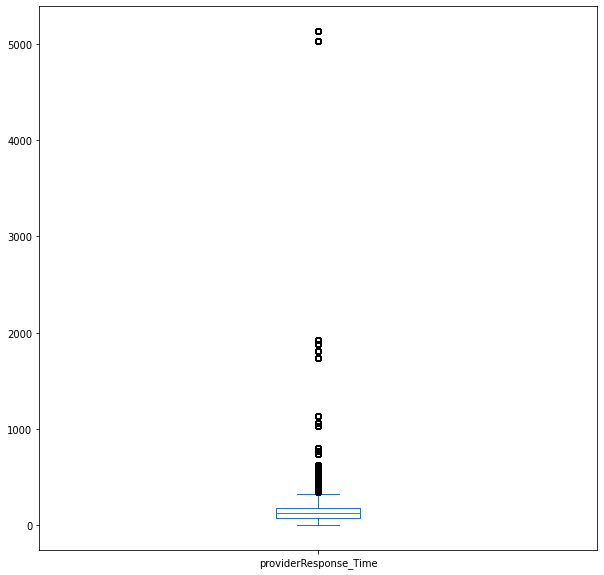

In [37]:
df["providerResponse_Time"].plot(kind = 'box', figsize=(10,10))

In real case, **providerResponse_Time** more than **10 seconds** (intuitive-based) considers as **outliers**. We should do diagnostic analytics for outliers and notif providers.

But it's not the case because here we have mock data.

In [38]:
df[df["providerResponse_Time"] > 10].shape[0]

972027

### response_Time

<AxesSubplot: >

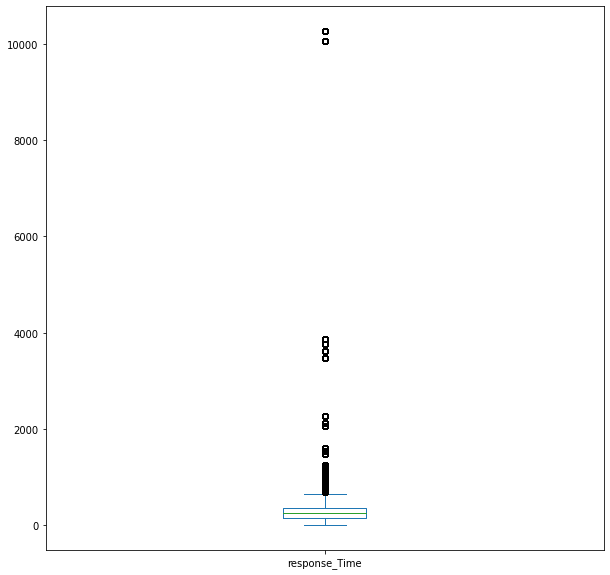

In [39]:
df["response_Time"].plot(kind = 'box', figsize=(10,10))

In real case, **response_Time** more than **20 seconds** (intuitive-based) considers as **outliers**. We should do diagnostic analytics for outliers and notif providers.

But it's not the case because here we have mock data.

### Relations

In [46]:
df.columns

Index(['log_level', 'code', 'method', 'username', 'Price', 'gwStatus',
       'planName', 'received_at', 'log_type', 'providerName', 'gatewayName',
       'response_status', 'status', 'response_Time', 'paymentType', 'endpoint',
       'providerResponse_Time', 'gwCode', 'call_type', 'api_type',
       'received_at_short', 'received_at_year', 'received_at_month',
       'received_at_day'],
      dtype='object')

In [47]:
df.corr()

/tmp/ipykernel_7775/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,code,Price,gwStatus,response_status,status,response_Time,providerResponse_Time,gwCode,received_at_year,received_at_month,received_at_day
code,1.000000,0.001966,NaN,0.000852,NaN,0.000327,0.000327,-0.001006,0.001168,-0.000031,0.000451
Price,0.001966,1.000000,NaN,0.001049,NaN,0.001011,0.001012,0.000193,-0.000773,0.000412,0.000965
gwStatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
response_status,0.000852,0.001049,NaN,1.000000,NaN,0.001003,0.001002,0.000698,-0.000844,0.000462,0.000358
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
response_Time,0.000327,0.001011,NaN,0.001003,NaN,1.000000,1.000000,0.000485,-0.001280,-0.000394,0.000195
providerResponse_Time,0.000327,0.001012,NaN,0.001002,NaN,1.000000,1.000000,0.000485,-0.001280,-0.000394,0.000195
gwCode,-0.001006,0.000193,NaN,0.000698,NaN,0.000485,0.000485,1.000000,-0.000069,0.001233,0.000946
received_at_year,0.001168,-0.000773,NaN,-0.000844,NaN,-0.001280,-0.001280,-0.000069,1.000000,-0.436756,-0.057109
received_at_month,-0.000031,0.000412,NaN,0.000462,NaN,-0.000394,-0.000394,0.001233,-0.436756,1.000000,0.005567


Because this is the mock data and also a lot our features are categorical, we dont have any correlation between features.